# <b> Table of Content </b>

## <u>Task 1: Data Preparation </u>

### Task 1.1: Import the entire network dataset and a NetworkX graph

### Task 1.2: Import demand dataset & produce the following rankings
- Task 1.2.1: Highest number of arrival and departure of passengers for each station and zones
- Task 1.2.2: Highest number of passengers for non-stepfree stations
- Task 1.2.3: Lowest number of passengers for all stations

### Task 1.3: Generate the following maps
- Task 1.3.1: Geographical structure of the entire network
- Task 1.3.2: Geographical structure of Zone 1
- Task 1.3.3: Map highlighting step-free stations

## <u>Task 2: Data Analysis </u>
- Task 2.2: Use a dictionary of stations with step-free acccess to indicate journeys in demands file that start or end at step-free stations. What proportion is currently step free?

- Task 2.3: Use all_pairs_dijkstra_path() and travel times to obtain a dictionary of shortest paths among all station pairs in the network. 

## <u>Task 3: Selection of Future Stations</u>
- Task 3.2: Implement your model using PuLP and list the stations that are identified by your model.

In [1]:
# Import libraries
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.patches as mpatches
from pulp import *

## <u>Task 1: Data Preparation </u>

### Task 1.1: Import the entire network dataset and a NetworkX graph.

Text(0.5, 1.0, 'Preliminary map of the underground network')

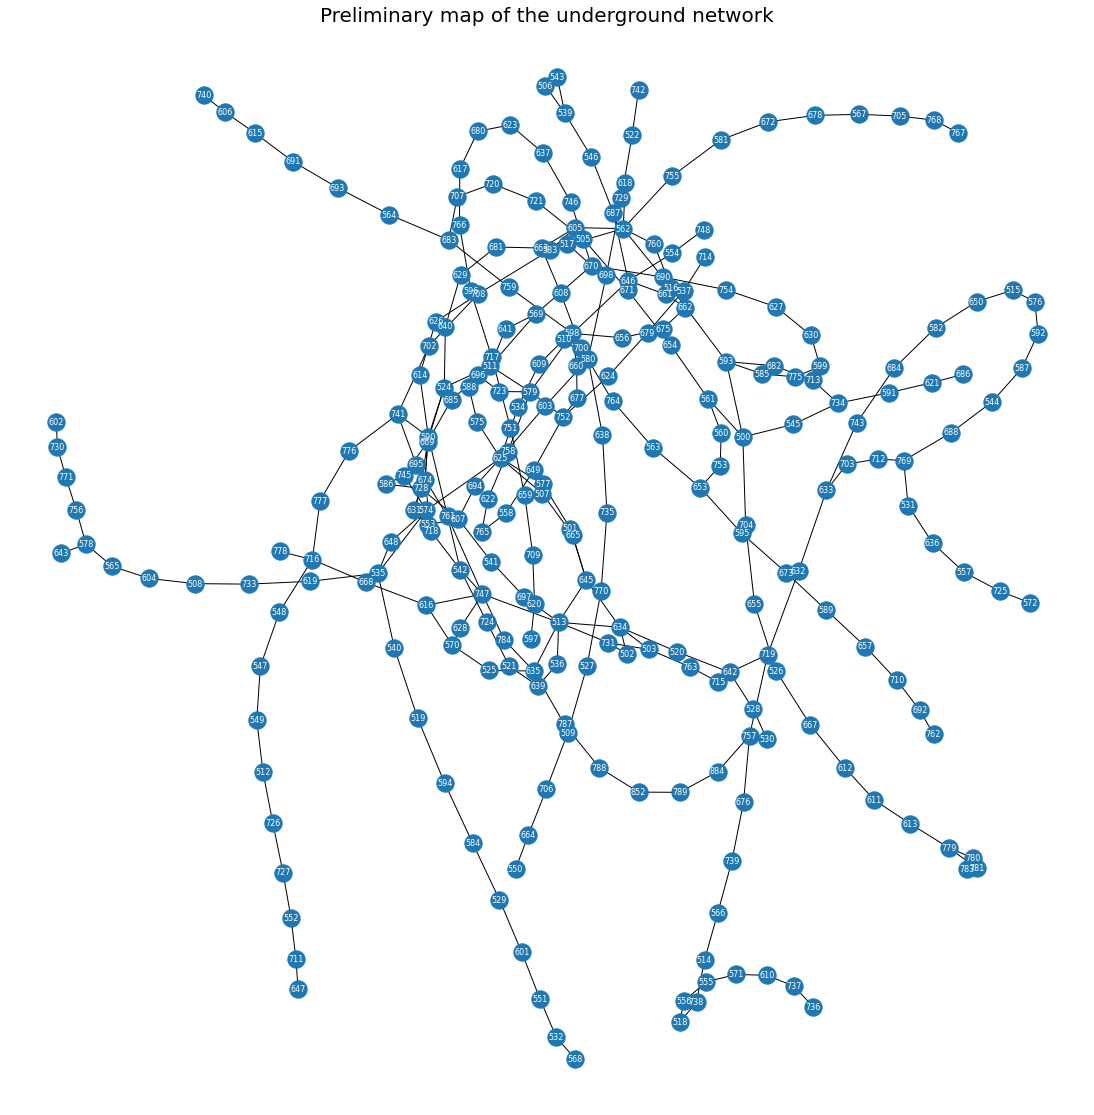

In [2]:
## Task 1.1: Import the entire network dataset
demands = pd.read_csv('demand.csv')
links = pd.read_csv('links.csv')
stations = pd.read_csv('stations.csv')

# NetworkX graph from links between station
graph_1_1 = nx.Graph()
nodes = stations.id
edges = list(zip(links.station1, links.station2))

# Add nodes and edges
graph_1_1.add_nodes_from(nodes)
graph_1_1.add_edges_from(edges)

# Plot graph
plt.figure(figsize=(15,15)) 
nx.draw(graph_1_1,with_labels = True, font_color = 'white', node_size=300,font_size=8) 
plt.title('Preliminary map of the underground network', size = 20)


### Task 1.2: Import demand dataset & produce the following rankings

In [3]:
# Preparing the dataset for the entire task

# Obtaining total number of passengers arriving and departing
departing_passengers = {}
arriving_passengers = {}
for x in stations.id:
    departing_passengers[x] = demands.demand[demands.station1_id == x].sum()
    arriving_passengers[x] = demands.demand[demands.station2_id == x].sum()

# Obtaining the highest number of passengers at each station at any given time
departing_counter = Counter(departing_passengers); arriving_counter = Counter(arriving_passengers)
total_passengers = departing_counter + arriving_counter

# Create new dataframe
data_1_2 = pd.DataFrame()
data_1_2['Station IDs'] = stations.id
data_1_2['Names'] = stations.name
data_1_2['Zones'] = stations.zone
data_1_2['Stepfree'] = stations.stepfree
data_1_2['Arrivals'] = arriving_passengers.values()
data_1_2['Departures'] = departing_passengers.values()
data_1_2['Total_Passengers'] = total_passengers.values()

# View dataset
data_1_2.head(5)

,Station IDs,Names,Zones,Stepfree,Arrivals,Departures,Total_Passengers
0,500,Acton Town,3.0,1,22551,22458,45009
1,502,Aldgate,1.0,0,30534,26257,56791
2,503,Aldgate East,1.0,0,51055,56536,107591
3,505,Alperton,4.0,0,11038,10382,21420
4,506,Amersham,10.0,1,3459,4611,8070


#### - Task 1.2.1: Highest number of arrival and departure of passengers for each station and zones

4 rankings were produced in this section:
- Highest number of arrival
- Highest number of departure
- Highest number of total demand
- Highest number of total demand by zones

Stations with 0.5 decimal places are considered to be in both zones, to it's nearest integer. For example, Zone 1.5 is in both Zone 1 and Zone 2. Based on the analysis, we can conclude that Zone 1 has the highest total demand out of all the zones. An interesting finding is that the total demand does not vary linearly as the zones increase - maximum station total demand in Zone 3 (Stratford Station) has a higher maximum total demand than Zone 2. However, there is a large difference in total demand of the subsequent stations in Zone 3 - this shows that Stratford Station may be an anomaly. An additional finding from the rankings is that all stations in Zone 7 are not step-free and this is not ideal for the transportation network.

In [4]:
## Task 1.2.1: Highest number of passengers arriving
data_1_2.sort_values('Arrivals', ascending = False).head(10)

,Station IDs,Names,Zones,Stepfree,Arrivals,Departures,Total_Passengers
126,625,King's Cross St. Pancras,1.0,1,384616,374478,759094
216,719,Stratford,3.0,1,342897,316349,659246
167,669,Oxford Circus,1.0,0,327946,286007,613953
137,635,London Bridge,1.0,1,316250,334514,650764
242,747,Waterloo,1.0,1,298660,277513,576173
136,634,Liverpool Street,1.0,1,272128,252678,524806
237,741,Victoria,1.0,1,255800,243581,499381
11,513,Bank & Monument,1.0,0,241027,234668,475695
74,574,Euston,1.0,0,180200,176314,356514
172,674,Piccadilly Circus,1.0,0,177052,175268,352320


In [5]:
## Task 1.2.1: Highest number of passengers departing
data_1_2.sort_values('Departures', ascending = False).head(10)

,Station IDs,Names,Zones,Stepfree,Arrivals,Departures,Total_Passengers
126,625,King's Cross St. Pancras,1.0,1,384616,374478,759094
137,635,London Bridge,1.0,1,316250,334514,650764
216,719,Stratford,3.0,1,342897,316349,659246
167,669,Oxford Circus,1.0,0,327946,286007,613953
242,747,Waterloo,1.0,1,298660,277513,576173
136,634,Liverpool Street,1.0,1,272128,252678,524806
237,741,Victoria,1.0,1,255800,243581,499381
11,513,Bank & Monument,1.0,0,241027,234668,475695
133,631,Leicester Square,1.0,0,169860,186859,356719
74,574,Euston,1.0,0,180200,176314,356514


In [6]:
## Task 1.2.1: Highest number of passengers departing and arriving
data_1_2.sort_values('Total_Passengers', ascending = False).head(10)

,Station IDs,Names,Zones,Stepfree,Arrivals,Departures,Total_Passengers
126,625,King's Cross St. Pancras,1.0,1,384616,374478,759094
216,719,Stratford,3.0,1,342897,316349,659246
137,635,London Bridge,1.0,1,316250,334514,650764
167,669,Oxford Circus,1.0,0,327946,286007,613953
242,747,Waterloo,1.0,1,298660,277513,576173
136,634,Liverpool Street,1.0,1,272128,252678,524806
237,741,Victoria,1.0,1,255800,243581,499381
11,513,Bank & Monument,1.0,0,241027,234668,475695
133,631,Leicester Square,1.0,0,169860,186859,356719
74,574,Euston,1.0,0,180200,176314,356514


In [7]:
## Task 1.2.1: Highest number of passengers departing and arriving in all zones
# Create array for for loop
station_range = np.arange(1.5, 11.5, 1).tolist()
station_range.insert(0,0)

# print out highest total passengers in each zone
for x in range(0,len(station_range)-1):
    display(data_1_2[[station_range[x] <= i <=station_range[x+1] for i in data_1_2.Zones]].sort_values('Total_Passengers', ascending = False).head(5))

,Station IDs,Names,Zones,Stepfree,Arrivals,Departures,Total_Passengers
126,625,King's Cross St. Pancras,1.0,1,384616,374478,759094
137,635,London Bridge,1.0,1,316250,334514,650764
167,669,Oxford Circus,1.0,0,327946,286007,613953
242,747,Waterloo,1.0,1,298660,277513,576173
136,634,Liverpool Street,1.0,1,272128,252678,524806


,Station IDs,Names,Zones,Stepfree,Arrivals,Departures,Total_Passengers
36,852,Canary Wharf,2.0,1,163679,161105,324784
35,788,Canada Water,2.0,1,135149,150275,285424
93,593,Hammersmith,2.0,1,130606,134943,265549
106,603,Highbury & Islington,2.0,0,133949,127644,261593
236,777,Vauxhall,1.5,1,120702,122382,243084


,Station IDs,Names,Zones,Stepfree,Arrivals,Departures,Total_Passengers
216,719,Stratford,3.0,1,342897,316349,659246
37,884,Canning Town,3.0,1,132850,135710,268560
154,789,North Greenwich,2.5,1,120752,116436,237188
193,698,Seven Sisters,3.0,0,95714,105465,201179
60,560,Ealing Broadway,3.0,0,71180,71784,142964


,Station IDs,Names,Zones,Stepfree,Arrivals,Departures,Total_Passengers
245,752,Wembley Park,4.0,1,66428,66947,133375
13,514,Barking,4.0,1,53614,49231,102845
65,566,East Ham,3.5,1,49040,51972,101012
135,633,Leytonstone,3.5,0,38423,38895,77318
185,686,Richmond,4.0,1,44739,31684,76423


,Station IDs,Names,Zones,Stepfree,Arrivals,Departures,Total_Passengers
98,598,Harrow-on-the-Hill,5.0,1,40987,38069,79056
57,556,Dagenham Heathway,5.0,1,20534,21159,41693
158,657,Northolt,5.0,0,16799,18457,35256
68,568,Edgware,5.0,1,17394,17627,35021
212,714,Stanmore,5.0,1,15045,15043,30088


,Station IDs,Names,Zones,Stepfree,Arrivals,Departures,Total_Passengers
102,780,Heathrow Terminals 123,6.0,1,37133,40084,77217
235,740,Uxbridge,6.0,1,26538,27608,54146
101,783,Heathrow Terminal 5,6.0,1,21286,22688,43974
73,572,Epping,6.0,1,15325,15380,30705
99,779,Hatton Cross,5.5,0,12136,12263,24399


,Station IDs,Names,Zones,Stepfree,Arrivals,Departures,Total_Passengers
186,687,Rickmansworth,7.0,0,5763,6094,11857
55,554,Croxley,7.0,0,3107,3292,6399
146,646,Moor Park,6.5,0,2749,2803,5552


,Station IDs,Names,Zones,Stepfree,Arrivals,Departures,Total_Passengers
243,748,Watford,8.0,0,5758,6006,11764
47,546,Chorleywood,8.0,1,1863,1841,3704


,Station IDs,Names,Zones,Stepfree,Arrivals,Departures,Total_Passengers
40,539,Chalfont & Latimer,9.0,1,4268,4354,8622


,Station IDs,Names,Zones,Stepfree,Arrivals,Departures,Total_Passengers
4,506,Amersham,10.0,1,3459,4611,8070
44,543,Chesham,10.0,1,3283,3717,7000


#### Task 1.2.2: Highest number of passengers for non-stepfree stations

The finding from this dataset shows that the top 10 highest number of total passengers out of all non-step free stations are placed in Zone 1 and 2. But the change in total demand decreases by three fold between the station with the highest demand and the 10th highest demand.

In [8]:
data_1_2[data_1_2.Stepfree == 0].sort_values('Total_Passengers', ascending = False).head(10)

,Station IDs,Names,Zones,Stepfree,Arrivals,Departures,Total_Passengers
167,669,Oxford Circus,1.0,0,327946,286007,613953
11,513,Bank & Monument,1.0,0,241027,234668,475695
133,631,Leicester Square,1.0,0,169860,186859,356719
74,574,Euston,1.0,0,180200,176314,356514
172,674,Piccadilly Circus,1.0,0,177052,175268,352320
200,708,South Kensington,1.0,0,144146,137009,281155
106,603,Highbury & Islington,2.0,0,133949,127644,261593
34,535,Camden Town,2.0,0,112121,101714,213835
109,607,Holborn,1.0,0,109648,99577,209225
9,511,Baker Street,1.0,0,102255,102826,205081


#### Task 1.2.3: Lowest number of passengers for all stations
The dataset shows that the top 10 lowest number of total passengers out of all the stations are distributed outside of Zone 1. The relevancy of these stations should be assesed to see it's reason for it's low uptake.

In [9]:
data_1_2.sort_values('Total_Passengers', ascending = True).head(10)

,Station IDs,Names,Zones,Stepfree,Arrivals,Departures,Total_Passengers
187,688,Roding Valley,5.0,1,1452,1278,2730
45,544,Chigwell,5.0,0,1478,1640,3118
47,546,Chorleywood,8.0,1,1863,1841,3704
87,587,Grange Hill,5.0,0,1834,2102,3936
120,618,Kensington (Olympia),2.0,1,1827,3139,4966
146,646,Moor Park,6.5,0,2749,2803,5552
153,654,North Ealing,3.0,0,2853,3155,6008
232,737,Upminster Bridge,6.0,0,3068,3201,6269
55,554,Croxley,7.0,0,3107,3292,6399
44,543,Chesham,10.0,1,3283,3717,7000


### Task 1.3: Generate the following maps

#### Task 1.3.1: Geographical structure of the entire network

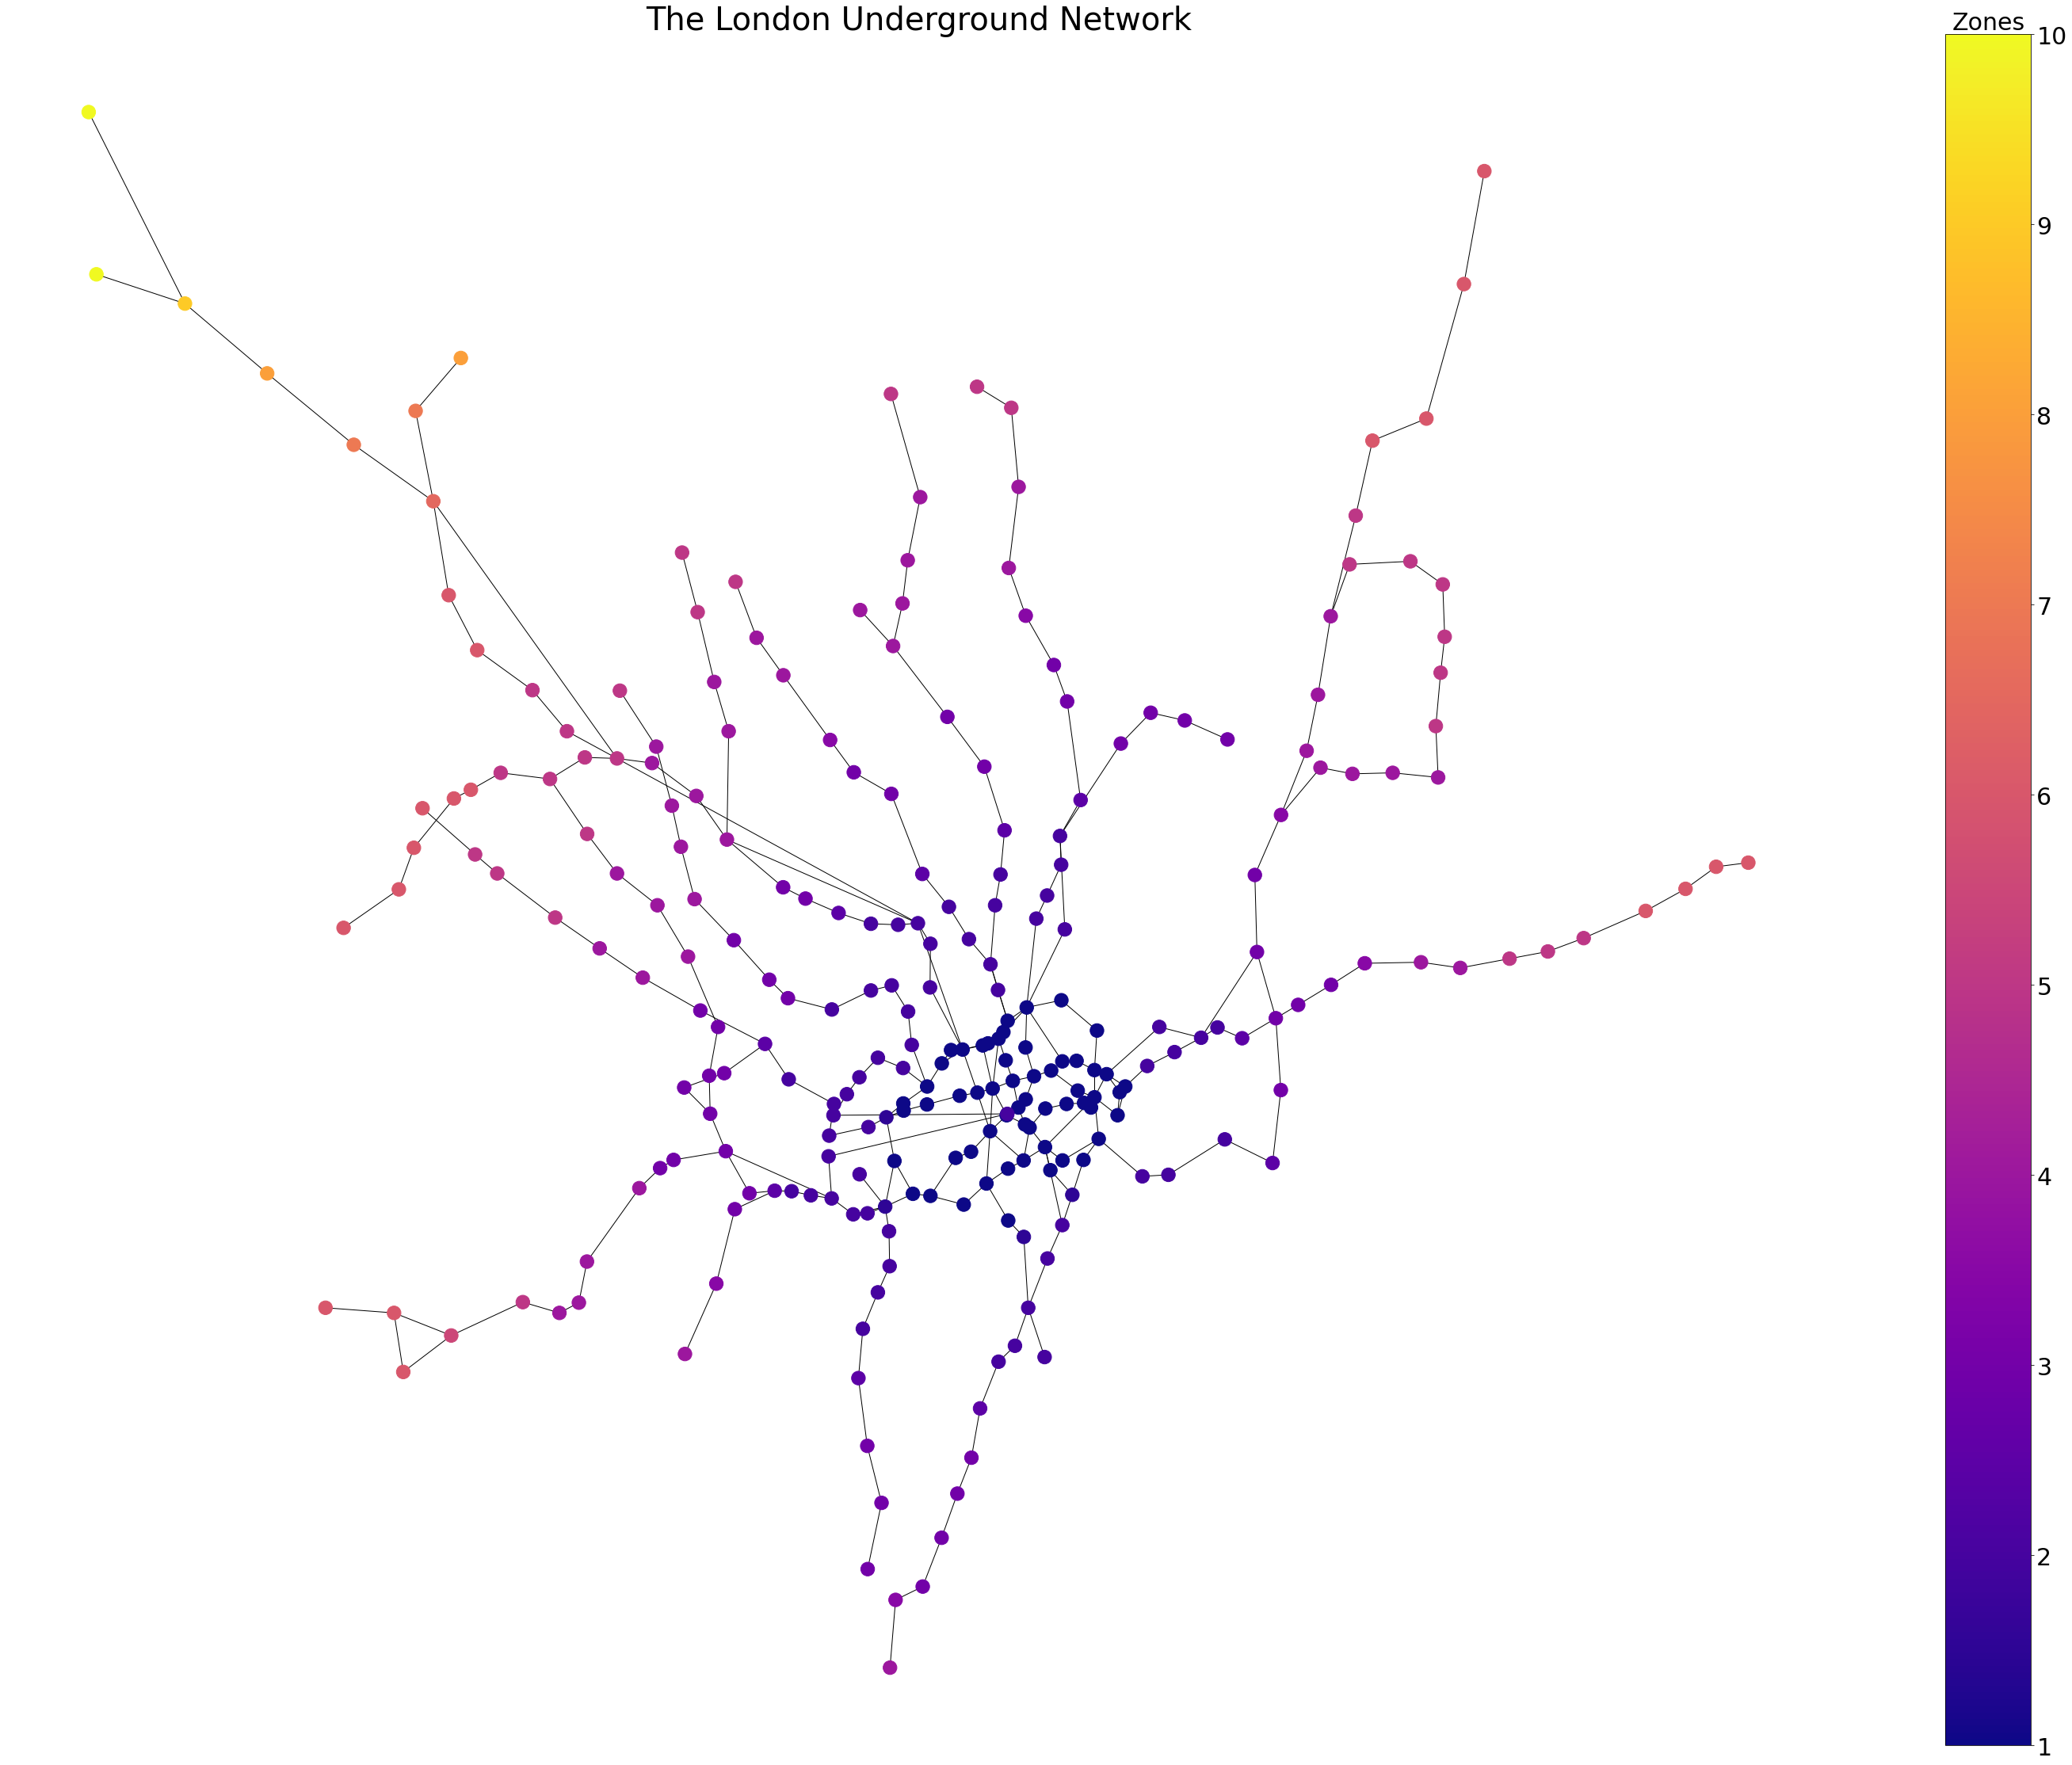

In [10]:
# Import longitude and latitude as tuples
coordinates = list(zip(stations.longitude, stations.latitude))
pos_1_3_1 = dict(zip(nodes, coordinates))
    
# Create network graph
graph_1_3_1 = nx.Graph()
graph_1_3_1.add_nodes_from(nodes)
graph_1_3_1.add_edges_from(edges)
plt.figure(figsize=(40,30)) 

# Create a colorbar for the zones and make nodes look pretty :)
map_colors=range(1,11) # To match 10 zones
cmap=plt.cm.plasma
nx.draw(graph_1_3_1, pos_1_3_1, cmap = cmap, node_color = [stations.zone], with_labels = False, font_color = 'white', node_size=300, font_size=8)
bar_colours =plt.cm.ScalarMappable(cmap = cmap, norm=plt.Normalize(min(map_colors), max(map_colors)))
cbar = plt.colorbar(bar_colours)

# Labels
plt.title('The London Underground Network', size = 40)
cbar.ax.tick_params(labelsize=30)
cbar.ax.set_title("Zones", size = 30)  
plt.show()

#### Task 1.3.2: Geographical structure of Zone 1

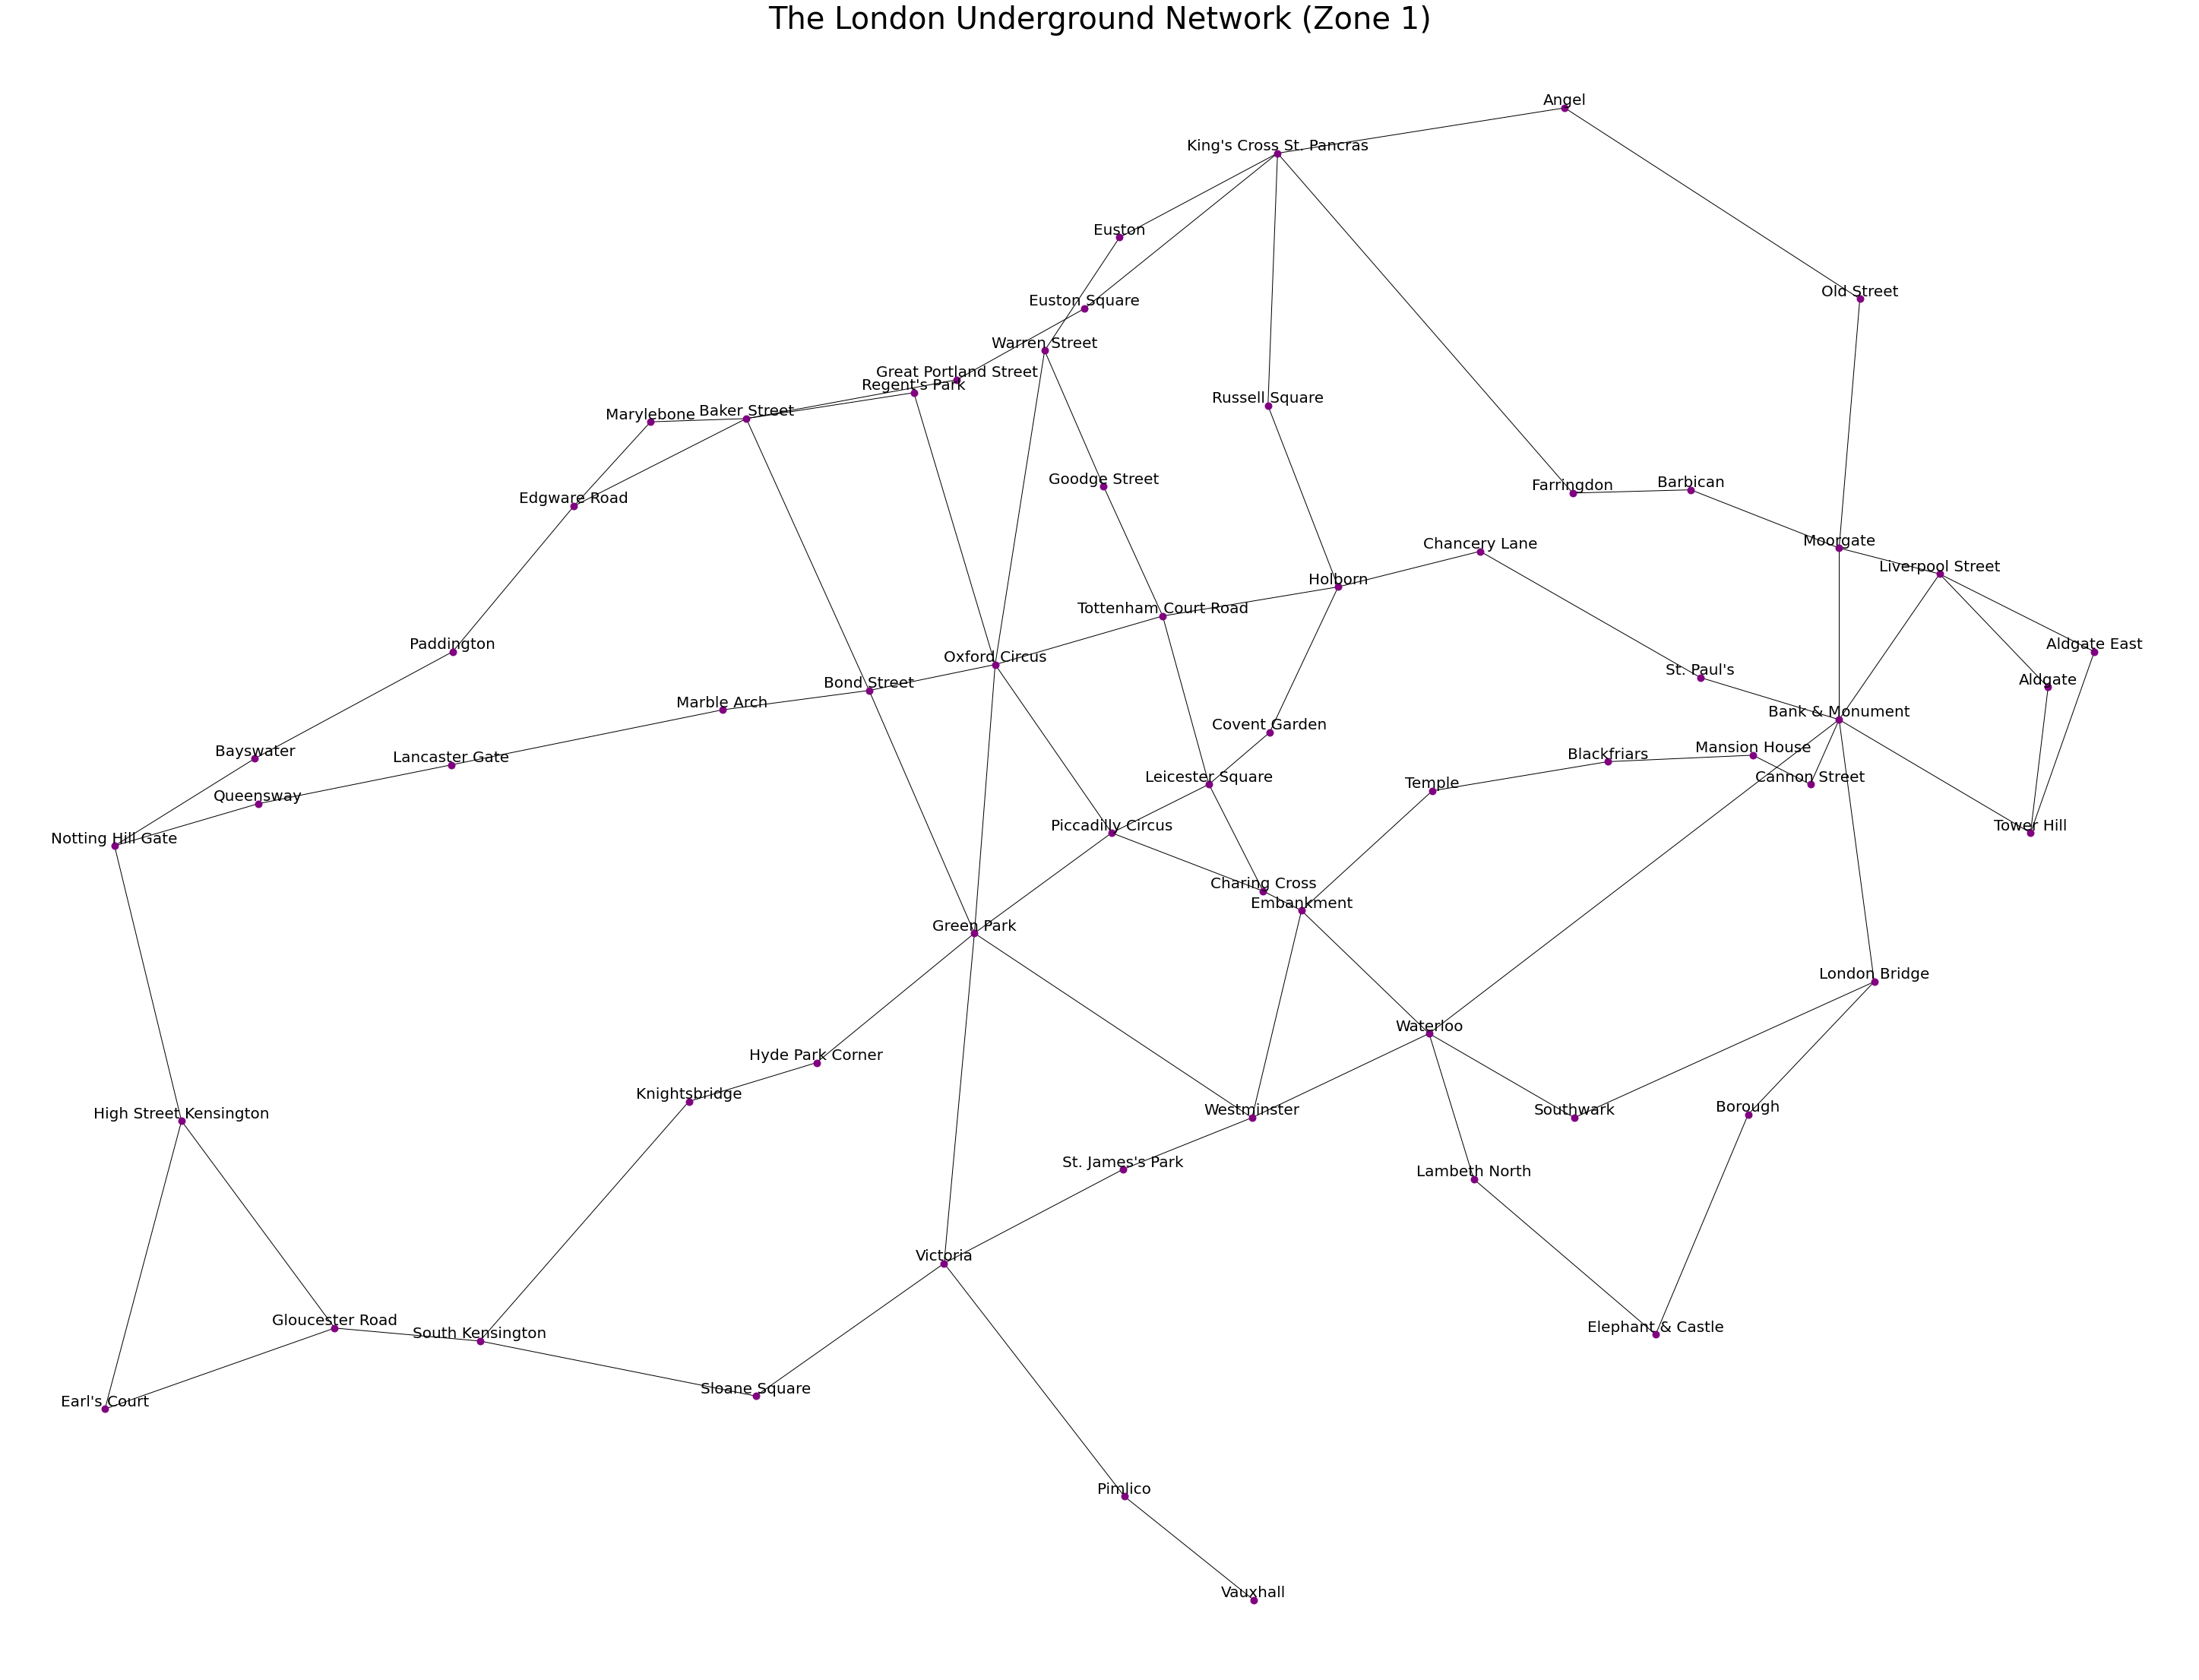

In [11]:
# IDs in Zone 1 only
zone_one_id = stations.id[stations.zone < 2]

# Edges in Zone 1 only
filter_1 = links.loc[links.station1.isin(zone_one_id)]
filter_2 = filter_1.loc[filter_1.station2.isin(zone_one_id)]
edges_1_3_2 = list(zip(filter_2.station1, filter_2.station2))

# Positions of nodes in Zone 1 only
coordinates = list(zip(stations.longitude[stations.zone < 2], stations.latitude[stations.zone < 2]))
pos_1_3_2 = dict(zip(zone_one_id, coordinates))

# Labels for each nodes
labels_1_3_2 = dict(zip(zone_one_id, stations.name[stations.zone < 2] ))

# Draw graph
graph_1_3_2 = nx.Graph()
graph_1_3_2.add_nodes_from(zone_one_id)
graph_1_3_2.add_edges_from(edges_1_3_2)
plt.figure(figsize=(40,30)) 
nx.draw(graph_1_3_2,pos_1_3_2, labels = labels_1_3_2, with_labels = True, verticalalignment='bottom', font_color = 'black', node_color = 'purple', node_size = 80,font_size=20) 

# Labels
plt.title('The London Underground Network (Zone 1)', size = 40)
plt.show()

 #### Task 1.3.3: Map highlighting step-free stations

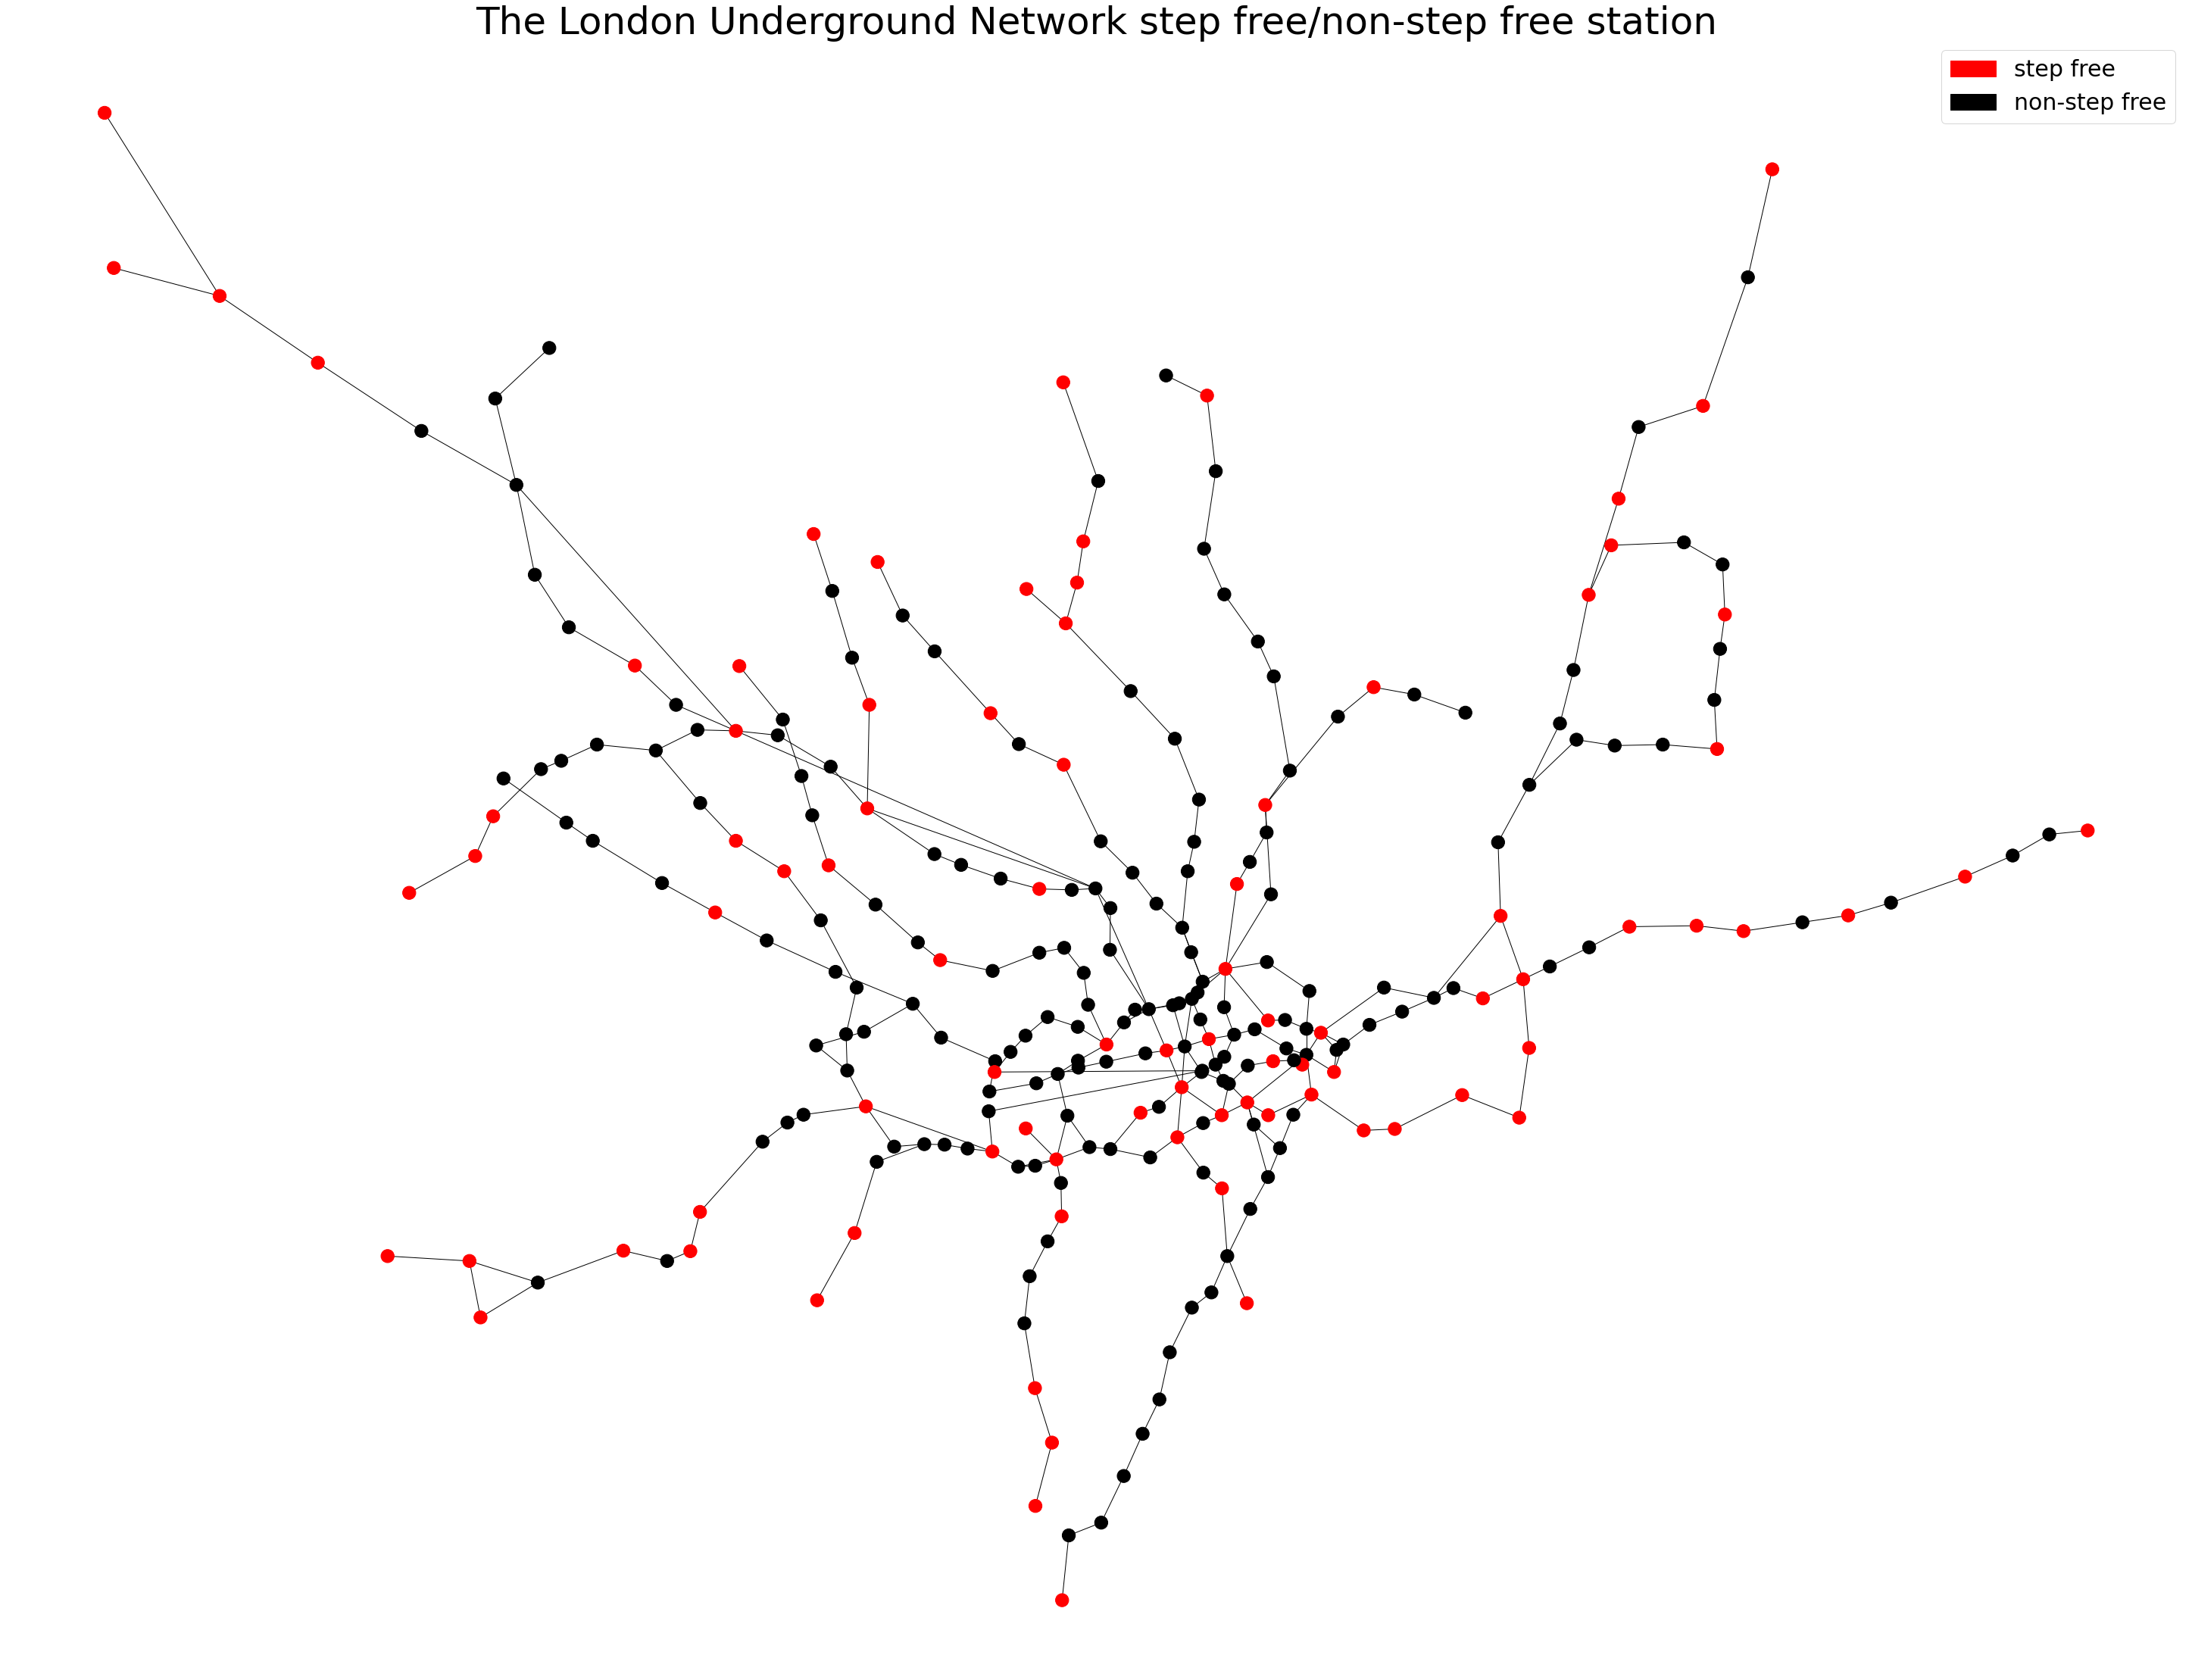

In [12]:
# Create a network
graph_1_3_3 = nx.Graph()
graph_1_3_3.add_nodes_from(nodes)
graph_1_3_3.add_edges_from(edges)
plt.figure(figsize=(40,30)) 

# Identify stations with step-free facilitites
ids_step = list(stations.id [stations.stepfree == 1])

# Specify color of each node
node_colour = ['black' if not nodes in ids_step else 'red' for nodes in graph_1_3_3.nodes()]

# Create a colorbar for the zones and make nodes look pretty :)
nx.draw(graph_1_3_3, pos_1_3_1, node_color = node_colour, with_labels = False, font_color = 'white', node_size=300, font_size=8)

# Labels
red_patch = mpatches.Patch(color='red', label='step free')
black_patch = mpatches.Patch(color='black', label='non-step free')
plt.legend(handles=[red_patch, black_patch], prop={'size': 30})
plt.title('The London Underground Network step free/non-step free station', size = 50)
plt.show()


# Task 2: Data Analysis


### Task 2.2: Use a dictionary of stations with step-free acccess to indicate journeys in demands file that start or end at step-free stations. What proportion is currently step free?



In [13]:
# Create a dictionary of stations with step-free access
dict_step_free = dict(zip(ids_step, stations.zone[stations.stepfree == 1] )) # Reuse ids_step dataset from section 1.3.3

# Journeys that start or end at a step-free station
journey_part_step_free = demands[demands.station1_id.isin(dict_step_free) | demands.station2_id.isin(dict_step_free)]

# Journeys that are step-free (start and end at a step-free journey)
journey_full_step_free = demands[demands.station1_id.isin(dict_step_free) & demands.station2_id.isin(dict_step_free)]

# Proportion of weekly trips that are step-free (with no consideration of the step-free status of any stations that are used for interchanges)
proportion = journey_full_step_free.demand.sum()/demands.demand.sum()*100
print('The proportion of step free journey is ' + str(proportion) + '%.')

The proportion of step free journey is 23.38610497122991%.


### Task 2.3: Use all_pairs_dijkstra_path() and travel times to obtain a dictionary of shortest paths among all station pairs in the network. 

In [24]:
# Create graph
graph_2_3 = nx.DiGraph() # DiGraph used for directed graphs
graph_2_3.add_edges_from(edges)
graph_2_3.add_nodes_from(nodes)

# Add weights to edges
weights = dict(zip(edges, links.time))
nx.set_edge_attributes(graph_2_3, values=weights, name='weight')

# Find shortest path between each station
shortest_paths = dict(nx.all_pairs_dijkstra_path(graph_2_3))

# Output dictionary
# shortest_paths (Commented out because the dictionary is too long)

In [15]:
# Create list of shortest links with duplicates
count_shortest_links = []
for key, value in shortest_paths.items():
    for key1, value1 in value.items():
        for station1, station2 in zip(value1, value1[1:]):
            count_shortest_links.append(sorted([station1, station2]))

# Count the occurences of each link and remove duplicates
occurence = collections.Counter(map(tuple, count_shortest_links))

# Create a dataframe for the links and number of occurence
station1_shortest = []
station2_shortest = []
zone1_shortest = []
zone2_shortest = []
stepfree1_shortest = []
stepfree2_shortest = []
occurence_shortest = []
for key, value in occurence.items():
    station1_shortest.append(stations.name[stations.id == key[0]].to_string(index=False))
    station2_shortest.append(stations.name[stations.id == key[1]].to_string(index=False))
    zone1_shortest.append(stations.zone[stations.id == key[0]].to_string(index=False))
    zone2_shortest.append(stations.zone[stations.id == key[1]].to_string(index=False))
    stepfree1_shortest.append(stations.stepfree[stations.id == key[0]].to_string(index=False))
    stepfree2_shortest.append(stations.stepfree[stations.id == key[1]].to_string(index=False))
    occurence_shortest.append(value)

data_shortest_links = pd.DataFrame()
data_shortest_links['Station1'] = station1_shortest
data_shortest_links['Station2'] = station2_shortest
data_shortest_links['Zone (Station 1)'] = zone1_shortest
data_shortest_links['Zone (Station 2)'] = zone2_shortest
data_shortest_links['Step free (Station 1)'] = stepfree1_shortest
data_shortest_links['Step free (Station 2)'] = stepfree2_shortest
data_shortest_links['Demand (Dijkstra)'] = occurence_shortest

# Rank the most encountered links
data_shortest_links.sort_values('Demand (Dijkstra)', ascending = False).head(10)

,Station1,Station2,Zone (Station 1),Zone (Station 2),Step free (Station 1),Step free (Station 2),Demand (Dijkstra)
152,Bethnal Green,Liverpool Street,2.0,1.0,0,1,17279
170,Bethnal Green,Mile End,2.0,2.0,0,0,16913
40,Gloucester Road,South Kensington,1.0,1.0,0,0,12468
29,Earl's Court,Gloucester Road,1.5,1.0,1,0,11672
135,Bank & Monument,Liverpool Street,1.0,1.0,0,1,11599
91,Baker Street,Bond Street,1.0,1.0,0,1,10818
128,Camden Town,Euston,2.0,1.0,0,0,10248
199,Leyton,Stratford,3.0,3.0,0,1,9840
184,Mile End,Stratford,2.0,3.0,0,1,9534
285,Bond Street,Oxford Circus,1.0,1.0,1,0,9451


### Task 3.2: Implement your model using PuLP and list the stations that are identified by your model

In [16]:
# Initiate maximizing problem
pulp_stations = LpProblem('problem',LpMaximize) 

# Cost of upgrading each station
cost = np.zeros((len(stations.zone),1)) # Set all stations to be zero to account for already stepfree stations

for i in range(0,len(stations.zone)):
    if stations.zone[i] <= 1.5 and stations.stepfree[i] == 0:
        cost[i] = 10 # Set cost as 10 if in zone 1
    elif stations.zone[i] > 1.5 and stations.stepfree[i] == 0:
        cost[i] = 5 # Set cost as 5 if not in zone 1

# Form a dictionary for the cost of each stations
station_cost = dict(zip(stations.id, cost))

# Maximum budget for the project
cost_max = 100

# Demand for each journey
journeys_duplicate = list(zip(demands.station1_id, demands.station2_id)) # There are duplicate journeys for Edgeware Road
demand_duplicate = tuple(zip(journeys_duplicate, demands.demand)) # There are duplicate values for Edgeware Road

demand = {}
for key, value in demand_duplicate:
    demand[key] = demand.get(key, 0) + value # Sum of all the demands in duplicated stations to get a uniques list of demand
    
# Get unique journeys
journeys = list(dict.fromkeys(journeys_duplicate))

# Decision variables
stations_vari = LpVariable.dicts("stations_vari", stations.id, lowBound = 0, upBound = 1, cat = LpInteger) # Station that need to be renovated
journeys_vari = LpVariable.dicts("journeys_vari", demand, lowBound = 0, upBound = 1, cat = LpInteger) # Journey needs to be maximised

# Define objective equation: maximize demand
pulp_stations += lpSum(journeys_vari[i]*demand[i] for i in journeys) # lpSum is used to accelerate calculation speed

# Define constraints: cost below 100
pulp_stations += lpSum(stations_vari[i]*station_cost[i] for i in stations.id) <= cost_max

# Relationship between journeys and stations
for station1,station2 in journeys:
    pulp_stations += journeys_vari[(station1,station2)] <= stations_vari[station1] # Station 1 must be stepfree in journey selected to maximize
    pulp_stations += journeys_vari[(station1,station2)] <= stations_vari[station2] # Station 2 must be stepfree in journey selected to maximize
    pulp_stations += journeys_vari[(station1,station2)] >= (stations_vari[station1] + stations_vari[station2] -1) # If Station 1 & 2 stepfree but journey not selected, conditions become dissatisfied

# Solve problem
status = pulp_stations.solve()

In [17]:
# Check if solution is optimal

print(f'The solution is: {LpStatus[status]}\n')
print('The number of stepfree journeys are: ',pulp_stations.objective.value())

The solution is: Optimal

The number of stepfree journeys are:  4695882.0


In [18]:
# Obtain the IDs of the stations that have to be converted to stepfree and clean string to integer
solution_ids = []
for i in list(stations_vari.values()):
    if i.varValue == 1:
        solution_ids.append(i.name.replace("stations_vari_",""))

# Remove stations that are already stepfree from the list
convert_ids = []
for i in solution_ids:
    if int(i) in list(stations.id[stations.stepfree == 0]):
        convert_ids.append(i)

In [19]:
# Change ids from string to integers
convert_ids_int = list(map(int, convert_ids))

# Obtain name of stations and associated costs
convert_name = []; convert_cost = []; convert_zone = []
for i in convert_ids_int:
    convert_name.append(stations.name[stations.id == i].to_string(index=False))
    convert_cost.append(int(cost[stations.id == i]))
    convert_zone.append(int(stations.zone[stations.id == i]))

# Create dataframe for values
convert_stations = pd.DataFrame()
convert_stations['ID'] = convert_ids
convert_stations['Name'] = convert_name
convert_stations['Cost'] = convert_cost
convert_stations['Zone'] = convert_zone

# Check total cost
print('Total cost of retrofitting all the stations is: ' + str(sum(convert_cost)))
convert_stations

Total cost of retrofitting all the stations is: 100


,ID,Name,Cost,Zone
0,513,Bank & Monument,10,1
1,520,Bethnal Green,5,2
2,535,Camden Town,5,2
3,560,Ealing Broadway,5,3
4,574,Euston,10,1
5,603,Highbury & Islington,5,2
6,631,Leicester Square,10,1
7,669,Oxford Circus,10,1
8,674,Piccadilly Circus,10,1
9,698,Seven Sisters,5,3


In [20]:
potential_proportion = (pulp_stations.objective.value()/demands.demand.sum())*100
print('Proportion of stepfree journeys: '+ str(potential_proportion) + '%')

Proportion of stepfree journeys: 42.25007834365454%


### Task 3.3:  Illustrate  the  effect  of different spending levels and discuss any factors that you took into account in your analysis.

In [21]:
# Loop through different values of cost to obtain plateau in proportion of step-free journey relative to cost

# Create an array with different cost
cost_range = range(0,2000,100)

# Create an empty array to append proportion of step-free journeys
proportion_range = []

for cost in cost_range: 
    # Initiate maximizing problem
    pulp_stations_3_3 = LpProblem('problem',LpMaximize) 

    # Maximum budget for the project
    cost_max = cost
    
    # Define objective equation: maximize demand
    pulp_stations_3_3 += lpSum(journeys_vari[i]*demand[i] for i in journeys) # lpSum is used to accelerate calculation speed

    # Define constraints: cost below 100
    pulp_stations_3_3 += lpSum(stations_vari[i]*station_cost[i] for i in stations.id) <= cost_max

    # Relationship between journeys and stations
    for station1,station2 in journeys:
        pulp_stations_3_3 += journeys_vari[(station1,station2)] <= stations_vari[station1] # Station 1 must be stepfree in journey selected to maximize
        pulp_stations_3_3 += journeys_vari[(station1,station2)] <= stations_vari[station2] # Station 2 must be stepfree in journey selected to maximize
        pulp_stations_3_3 += journeys_vari[(station1,station2)] >= (stations_vari[station1] + stations_vari[station2] -1) # If Station 1 & 2 stepfree but journey not selected, conditions become dissatisfied

    # Solve problem
    status_3_3 = pulp_stations_3_3.solve()
    
    # Calculate the proportion of step_free jouneys
    potential_range_loop = (pulp_stations_3_3.objective.value()/demands.demand.sum())*100
    
    # Store the range of proportions of step-free journey
    proportion_range.append(potential_range_loop)


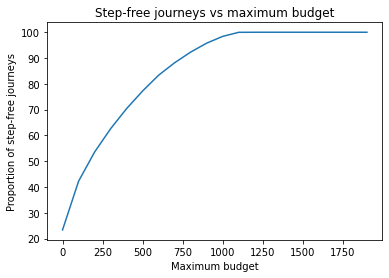

In [22]:
# Plot out graph to illustrate the increase in proportion based on increased budget

# x axis values
x = cost_range

# corresponding y axis values
y = proportion_range

# plotting the points
plt.plot(x, y)
 
# naming the x axis
plt.xlabel('Maximum budget')
# naming the y axis
plt.ylabel('Proportion of step-free journeys')
 
# giving a title to my graph
plt.title('Step-free journeys vs maximum budget')
 
# function to show the plot
plt.show()

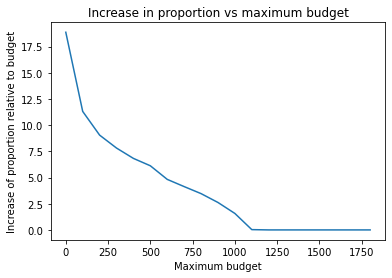

In [23]:
# Plot out graph to illustrate the rate fo change in proportion based on budget

# Calculate rate of change of proportion relative to maximum budget
from numpy import diff
dy = diff(y)
 
# plotting the points
plt.plot(x[:-1], dy)
 
# naming the x axis
plt.xlabel('Maximum budget')
# naming the y axis
plt.ylabel('Increase of proportion relative to budget')
 
# giving a title to my graph
plt.title('Increase in proportion vs maximum budget')
 
# function to show the plot
plt.show()